In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import timedelta

In [2]:
'''analisis customer dengan RFM(recency frequency monetary)'''

df = pd.read_csv(r'D:\01-FullStack Bangalore\00-FInal Project\02-unsupervised\online_shoppers.csv',
                 encoding = "ISO-8859-1").dropna()#encoding for UnicodeDecodeError
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

#invoice date berbentuk object 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [4]:
df.describe()
#ada nilai minus di quantity 

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.sort_values(by='Quantity',ascending='False').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,4/18/2011 13:08,2.10,15749.0,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,4/18/2011 13:08,1.85,15749.0,United Kingdom


In [6]:
df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
301005,563230,23345,DOLLY GIRL BEAKER,6,8/14/2011 15:39,1.25,15376.0,United Kingdom
261680,559878,48111,DOORMAT 3 SMILEY CATS,1,7/13/2011 11:19,7.95,15493.0,United Kingdom
206457,554938,22355,CHARLOTTE BAG SUKI DESIGN,20,5/27/2011 13:34,0.85,12876.0,Belgium


untuk melakukan clustering kolom yang d butuhkan adalah 
1.quantity 
2.InvoiceDate untuk recency 
3.UnitPrice


Data Prepocesing 

In [7]:
#membuat kolom monetary dengan rumus quantity x Unitprice 

df['monetary'] = df['Quantity'] * df['UnitPrice']
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00


In [8]:
df.sort_values(by='monetary',ascending='False').head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,monetary
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,-168469.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,-77183.6


In [9]:
#merubah tipe data InvoiceDate

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   monetary     406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [10]:
#mengecek tanggal terakhir pembelian 
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [11]:
#menmabhakan jeda satu hari pada tanggal terakhir 
#agar tidak ada yang null 

snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [12]:
#mencari frekuensi berapa kali cust transaksi 
df['CustomerID'].value_counts().sort_values(ascending=True)

16995.0       1
18233.0       1
15316.0       1
14679.0       1
14705.0       1
           ... 
14606.0    2782
12748.0    4642
14096.0    5128
14911.0    5903
17841.0    7983
Name: CustomerID, Length: 4372, dtype: int64

In [13]:
df['CustomerID'].value_counts().nlargest()
#transaski terbanyak berdasarkan customer ID 

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
Name: CustomerID, dtype: int64

In [14]:
#melihat nilai recency beberapa cust 

print(snapshot_date - df[df['CustomerID']==17841.0]['InvoiceDate'].max())
print(snapshot_date - df[df['CustomerID']==15311.0]['InvoiceDate'].max())
print(snapshot_date - df[df['CustomerID']==14679.0]['InvoiceDate'].max())

2 days 00:43:00
1 days 00:50:00
372 days 02:43:00


In [15]:
#frekuensi belanja 
df.groupby(['CustomerID'])['InvoiceNo'].count()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4372, dtype: int64

In [16]:
data = df.groupby(['CustomerID']).agg({
    'InvoiceDate' : lambda x : (snapshot_date - x.max()).days,
    'InvoiceNo' : 'count',
    'monetary' : 'sum'
})
data.head()
#berdarkan jumlah transaksi 

,InvoiceDate,InvoiceNo,monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [17]:
#Berdarkan rata2
data['Monetary']=data['monetary']/data['InvoiceNo']
data.head()

,InvoiceDate,InvoiceNo,monetary,Monetary
CustomerID,,,,
12346.0,326,2,0.00,0.000000
12347.0,2,182,4310.00,23.681319
12348.0,75,31,1797.24,57.975484
12349.0,19,73,1757.55,24.076027
12350.0,310,17,334.40,19.670588


In [18]:
data = data.drop(columns='monetary')
data.head()

,InvoiceDate,InvoiceNo,Monetary
CustomerID,,,
12346.0,326,2,0.000000
12347.0,2,182,23.681319
12348.0,75,31,57.975484
12349.0,19,73,24.076027
12350.0,310,17,19.670588


In [19]:
#merename nama kolom 

data.rename(columns={
    'InvoiceDate' : 'Recency',
    'InvoiceNo':'Frequency'},inplace=True)

In [20]:
data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.000000
12347.0,2,182,23.681319
12348.0,75,31,57.975484
12349.0,19,73,24.076027
12350.0,310,17,19.670588


RFM Preparation 

<AxesSubplot:xlabel='Frequency'>

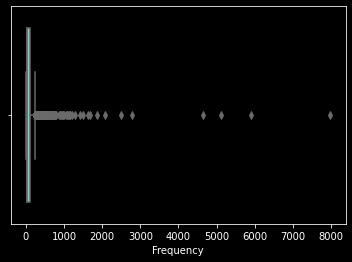

In [21]:
#melihat outliers untuk mendapatkan insight 
#outliers yang bermakna tidak perlu di buang 
#outliers dapat dijadikan bobot group RFM 

sns.boxplot(data=data, x='Frequency')

In [22]:
#pembagian bobot RFM bisa berdasarkan quantile / ketentuan khusus
# semakin tinggi frequency dan monetary makan akan semakin bagus 
#semakin tinggi recency maka akan semakin negative 
#pembagian RFM 1-4 berdarkan kategori buruk-baik

data['R'] = pd.qcut(x=data['Recency'],q=4, labels= range(4,0,-1))
data['F'] = pd.qcut(x=data['Frequency'],q=4, labels= range(1,5,1))
data['M'] = pd.qcut(x=data['Monetary'],q=4, labels= range(1,5,1))

data.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.000000,1,1,1
12347.0,2,182,23.681319,4,4,4
12348.0,75,31,57.975484,2,2,4
12349.0,19,73,24.076027,3,3,4
12350.0,310,17,19.670588,1,1,3


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    4372 non-null   int64   
 1   Frequency  4372 non-null   int64   
 2   Monetary   4372 non-null   float64 
 3   R          4372 non-null   category
 4   F          4372 non-null   category
 5   M          4372 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 149.8 KB


In [24]:
#menjumlahkan nilai Recency 

data['RFM'] = data[['R','F','M']].sum(axis=1)
data.sample(10)

,Recency,Frequency,Monetary,R,F,M,RFM
CustomerID,,,,,,,
14265.0,109,31,17.102581,2,2,3,7
17732.0,373,18,16.887222,1,2,2,5
18200.0,106,32,5.118750,2,2,1,5
16305.0,139,22,16.419091,2,2,2,6
13752.0,124,76,15.608947,2,3,2,7
13033.0,357,11,17.322727,1,1,3,5
16592.0,4,222,18.348108,4,4,3,11
13524.0,41,27,25.191852,3,2,4,9
15238.0,29,52,20.318077,3,3,3,9


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    4372 non-null   int64   
 1   Frequency  4372 non-null   int64   
 2   Monetary   4372 non-null   float64 
 3   R          4372 non-null   category
 4   F          4372 non-null   category
 5   M          4372 non-null   category
 6   RFM        4372 non-null   int64   
dtypes: category(3), float64(1), int64(3)
memory usage: 184.0 KB


In [26]:
#membuat rule berdasrkn RFM 

def rfm_segment(data):
    if data['RFM'] >=10 : 
        return 'GOLD'
    elif ((data['RFM']>=7) and (data['RFM']<10)):
        return 'Silver'
    elif ((data['RFM']>=4) and (data['RFM']<7)):
        return 'Bronze'
    else : 
        return 'Non-Member'

In [27]:
#menerapkan rule yang sudah di buat 
data['RFM_LVL'] = data.apply(rfm_segment, axis=1)

#syntax lain data['RFM_LVL'] = data['RFM'].apply(rfm_segment) fungsinya pakai x


In [28]:
data.sample(10)

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_LVL
CustomerID,,,,,,,,
15854.0,4,140,21.247500,4,4,3,11,GOLD
16184.0,64,46,25.120435,2,3,4,9,Silver
13565.0,19,38,6.321579,3,2,1,6,Bronze
14984.0,19,41,5.201707,3,2,1,6,Bronze
13570.0,243,27,8.870000,1,2,1,4,Bronze
16603.0,75,34,14.190294,2,2,2,6,Bronze
16729.0,36,668,10.593234,3,4,1,8,Silver
13871.0,23,338,18.904734,3,4,3,10,GOLD
17073.0,18,174,8.310862,3,4,1,8,Silver


In [29]:
#melihat jumlah Customer berdarkan level
data['RFM_LVL'].value_counts()

Silver        2163
Bronze        1392
GOLD           751
Non-Member      66
Name: RFM_LVL, dtype: int64

In [30]:
#melihat agg rfm+lvl 

data.groupby(['RFM_LVL']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','count']
})



Recency   Frequency    Monetary      
                  mean        mean        mean count
RFM_LVL                                             
Bronze      188.492816   27.218391   27.278956  1392
GOLD         13.644474  198.256991   36.559504   751
Non-Member  271.090909    8.090909 -126.082224    66
Silver       51.737864  101.486824   31.889551  2163

EDA part2

In [32]:
data = data.reset_index()
data.head()
#menggabungkan dengan data lama 

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_LVL
0,12346.0,326,2,0.000000,1,1,1,3,Non-Member
1,12347.0,2,182,23.681319,4,4,4,12,GOLD
2,12348.0,75,31,57.975484,2,2,4,8,Silver
3,12349.0,19,73,24.076027,3,3,4,10,GOLD
4,12350.0,310,17,19.670588,1,1,3,5,Bronze


In [39]:
df_2 = df.copy()

#merge 
df_2 = df_2.merge(data[['CustomerID','RFM_LVL']],on='CustomerID',how='inner')
df_2.sample(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,monetary,RFM_LVL
345608,561894,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1,2011-07-31 15:00:00,2.95,14456.0,United Kingdom,2.95,Silver
188502,562593,47590B,PINK HAPPY BIRTHDAY BUNTING,1,2011-08-07 15:43:00,5.45,16549.0,United Kingdom,5.45,Silver
77469,537204,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-05 14:45:00,0.42,15555.0,United Kingdom,4.20,Silver
88646,573348,21824,PAINTED METAL STAR WITH HOLLY BELLS,1,2011-10-30 12:27:00,0.39,14487.0,United Kingdom,0.39,Silver
346215,577106,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2011-11-17 17:18:00,3.25,14456.0,United Kingdom,3.25,Silver
132319,563505,23347,I LOVE LONDON BEAKER,12,2011-08-17 09:45:00,1.25,17865.0,United Kingdom,15.00,GOLD
96215,581188,20728,LUNCH BAG CARS BLUE,10,2011-12-07 16:47:00,1.65,17735.0,United Kingdom,16.50,GOLD


In [55]:
#mencari jumlah barang terbanyak terjual pada level silver 

df_silver = df_2[df_2['RFM_LVL']=='Silver'].copy()

#filterisasi 10 barang terartas yang di beli Silver 
filter_silver = df_silver.groupby(['RFM_LVL','Description'])['Description'].count().nlargest(10)
filter_silver

RFM_LVL  Description                       
Silver   WHITE HANGING HEART T-LIGHT HOLDER    1140
         REGENCY CAKESTAND 3 TIER               781
         JUMBO BAG RED RETROSPOT                692
         PARTY BUNTING                          683
         REX CASH+CARRY JUMBO SHOPPER           680
         ASSORTED COLOUR BIRD ORNAMENT          677
         LUNCH BAG  BLACK SKULL.                652
         LUNCH BAG RED RETROSPOT                644
         LUNCH BAG SPACEBOY DESIGN              584
         SET OF 3 CAKE TINS PANTRY DESIGN       581
Name: Description, dtype: int64

<AxesSubplot:ylabel='RFM_LVL,Description'>

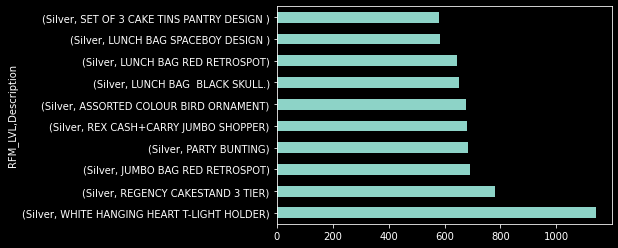

In [56]:
#ploting 
filter_silver.plot(kind='barh')

In [63]:
#mencari jumlah barang terbanyak terjual pada level GOLD 

df_GOLD = df_2[df_2['RFM_LVL']=='GOLD'].copy()

#filterisasi 10 barang terartas yang di beli GOLD 
filter_GOLD = df_GOLD.groupby(['RFM_LVL','Description'])['Description'].count().nlargest(10)
filter_GOLD

RFM_LVL  Description                       
GOLD     REGENCY CAKESTAND 3 TIER              931
         JUMBO BAG RED RETROSPOT               879
         POSTAGE                               731
         WHITE HANGING HEART T-LIGHT HOLDER    679
         LUNCH BAG RED RETROSPOT               645
         ASSORTED COLOUR BIRD ORNAMENT         600
         PARTY BUNTING                         572
         SET OF 3 CAKE TINS PANTRY DESIGN      533
         ALARM CLOCK BAKELIKE RED              492
         JUMBO BAG PINK POLKADOT               463
Name: Description, dtype: int64

<AxesSubplot:ylabel='RFM_LVL,Description'>

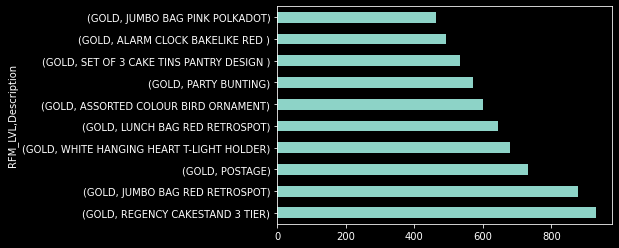

In [64]:
filter_GOLD.plot(kind='barh')

KMEANS CLUSTERING 

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [67]:
data.head(1)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_LVL
0,12346.0,326,2,0.0,1,1,1,3,Non-Member


In [ ]:
data = data.set_index('CustomerID')


In [70]:
data.head(3)

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_LVL
CustomerID,,,,,,,,
12346.0,326,2,0.000000,1,1,1,3,Non-Member
12347.0,2,182,23.681319,4,4,4,12,GOLD
12348.0,75,31,57.975484,2,2,4,8,Silver


In [76]:
data.columns #kolom yang di butuhkab dalam kmeans hanya Recency,frequency, monetary 

Index(['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM', 'RFM_LVL'], dtype='object')

In [79]:
#filter kolom 
data = data[data.columns[0:3]]
data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.000000
12347.0,2,182,23.681319
12348.0,75,31,57.975484
12349.0,19,73,24.076027
12350.0,310,17,19.670588


In [80]:
#standarisasi 
scaler = StandardScaler()

data[data.columns[0:3]] = scaler.fit_transform(data[data.columns[0:3]])

In [81]:
data.head(3)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,2.322023,-0.391720,-0.226527
12347.0,-0.893733,0.382657,-0.040513
12348.0,-0.169196,-0.266959,0.228864


In [82]:
#kmeans dengan looping unyuk mendapatkan elbow

inertias = []
for x in range(2,10):
    kmeans = KMeans(n_clusters=x)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

C:\Users\Tengku Muhammad Reza\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

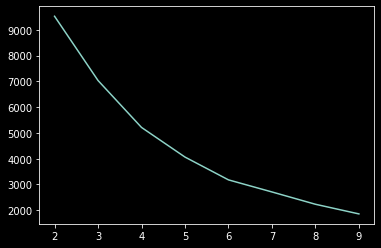

In [83]:
sns.lineplot(range(2,10),inertias)

#elbow sisi bisa pada cluster 4/6

In [84]:
#pembuatan cluster dengan n=4
kmeans = KMeans(n_clusters=4)


In [85]:
kmeans.fit(data)

KMeans(n_clusters=4)

In [86]:
kmeans.labels_

array([2, 0, 0, ..., 0, 0, 0])

In [88]:
data['Cluster'] = kmeans.labels_
data.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,2.322023,-0.391720,-0.226527,2
12347.0,-0.893733,0.382657,-0.040513,0
12348.0,-0.169196,-0.266959,0.228864,0
12349.0,-0.725005,-0.086271,-0.037413,0
12350.0,2.163220,-0.327188,-0.072017,2


<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

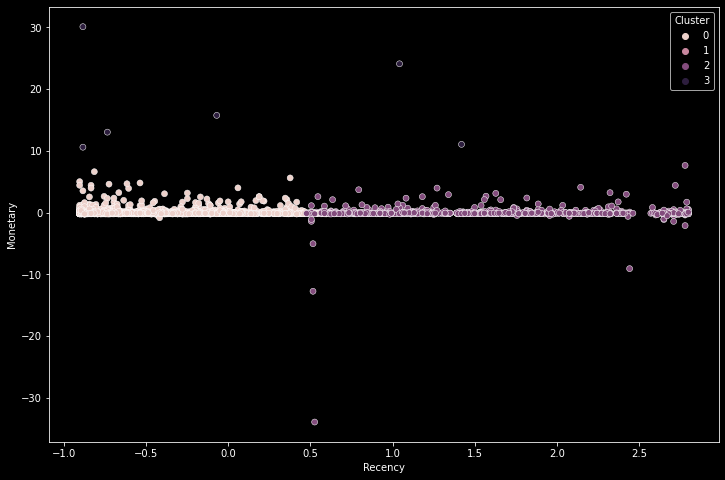

In [99]:
#visualisasi 
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='Recency', y='Monetary', hue='Cluster')

<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

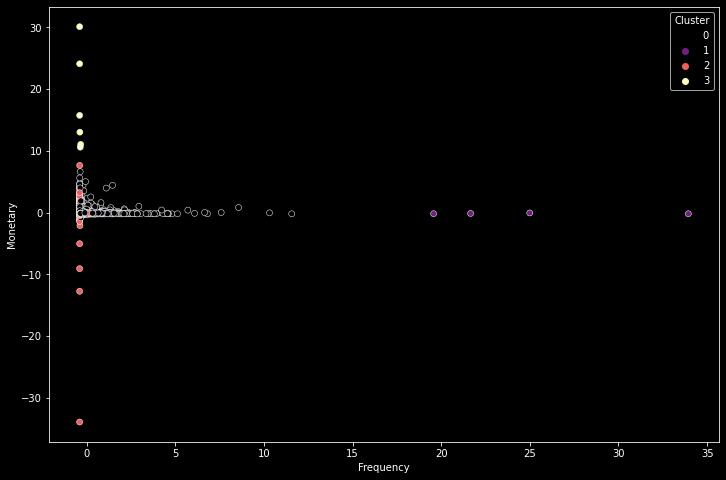

In [98]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='Frequency', y='Monetary', hue='Cluster',
                palette='magma')

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

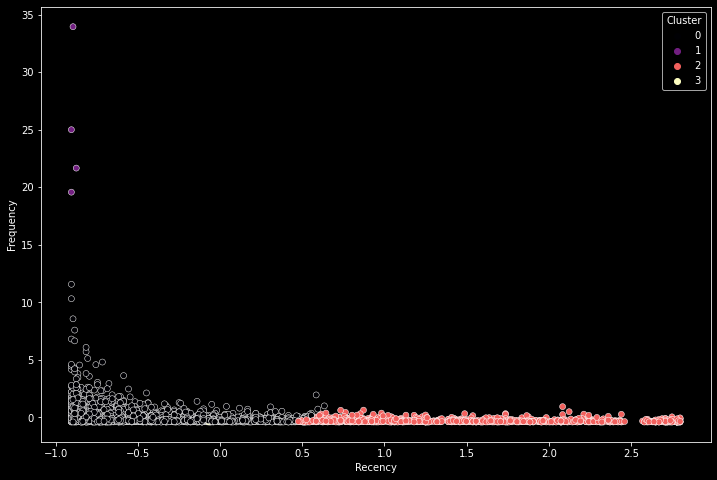

In [97]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='Recency', y='Frequency', hue='Cluster',
                palette='magma')

In [100]:
#pembuatan cluster dengan n=6
kmeans = KMeans(n_clusters=6)

In [101]:
kmeans.fit(data)

KMeans(n_clusters=6)

In [102]:
kmeans.labels_

array([1, 0, 0, ..., 0, 2, 0])

In [103]:
data['Clstr'] = kmeans.labels_

data.head(1)

,Recency,Frequency,Monetary,Cluster,Clstr
CustomerID,,,,,
12346.0,2.322023,-0.39172,-0.226527,2,1


<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

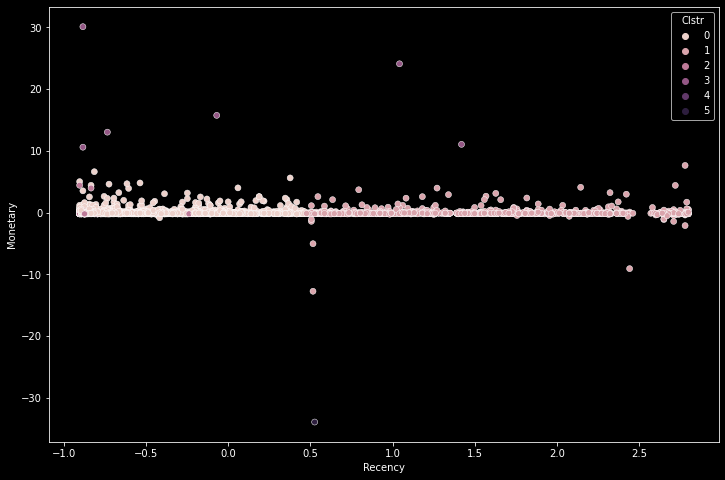

In [104]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='Recency', y='Monetary', hue='Clstr')